In [1]:
import pandas as pd
import numpy as np
from data_process import *
from metadata import *
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import seaborn as sns

init_notebook_mode(connected=True)
cf.go_offline()

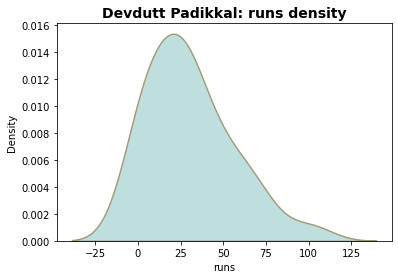

In [2]:
# run per match of given batsmen
def run_per_match(batsman):
    run_batsmen = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    run_batsmen = run_batsmen[['runs']]
    sns.kdeplot(run_batsmen['runs'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: runs density".format(batsman),fontsize=14, fontweight='bold')
    plt.savefig("../img/pngs/{}_runs_density.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)

run_per_match('Devdutt Padikkal')

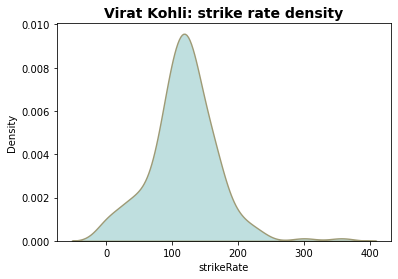

In [3]:
def strike_rate_per_match(batsman):
    strike_batsmen = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    strike_batsmen = strike_batsmen[['strikeRate']]
    strike_batsmen['strikeRate'] = strike_batsmen['strikeRate'].astype(float)
    sns.kdeplot(strike_batsmen['strikeRate'], shade=True, color='#008080', fill=True, lw=1.4, edgecolor='#9e9a75')
    plt.title("{}: strike rate density".format(batsman), fontsize=14, fontweight='bold')
    plt.savefig("../img/pngs/{}_strike_rate_density.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
strike_rate_per_match('Virat Kohli')

/tmp/ipykernel_13337/3467788738.py:26: UserWarning:

FixedFormatter should only be used together with FixedLocator



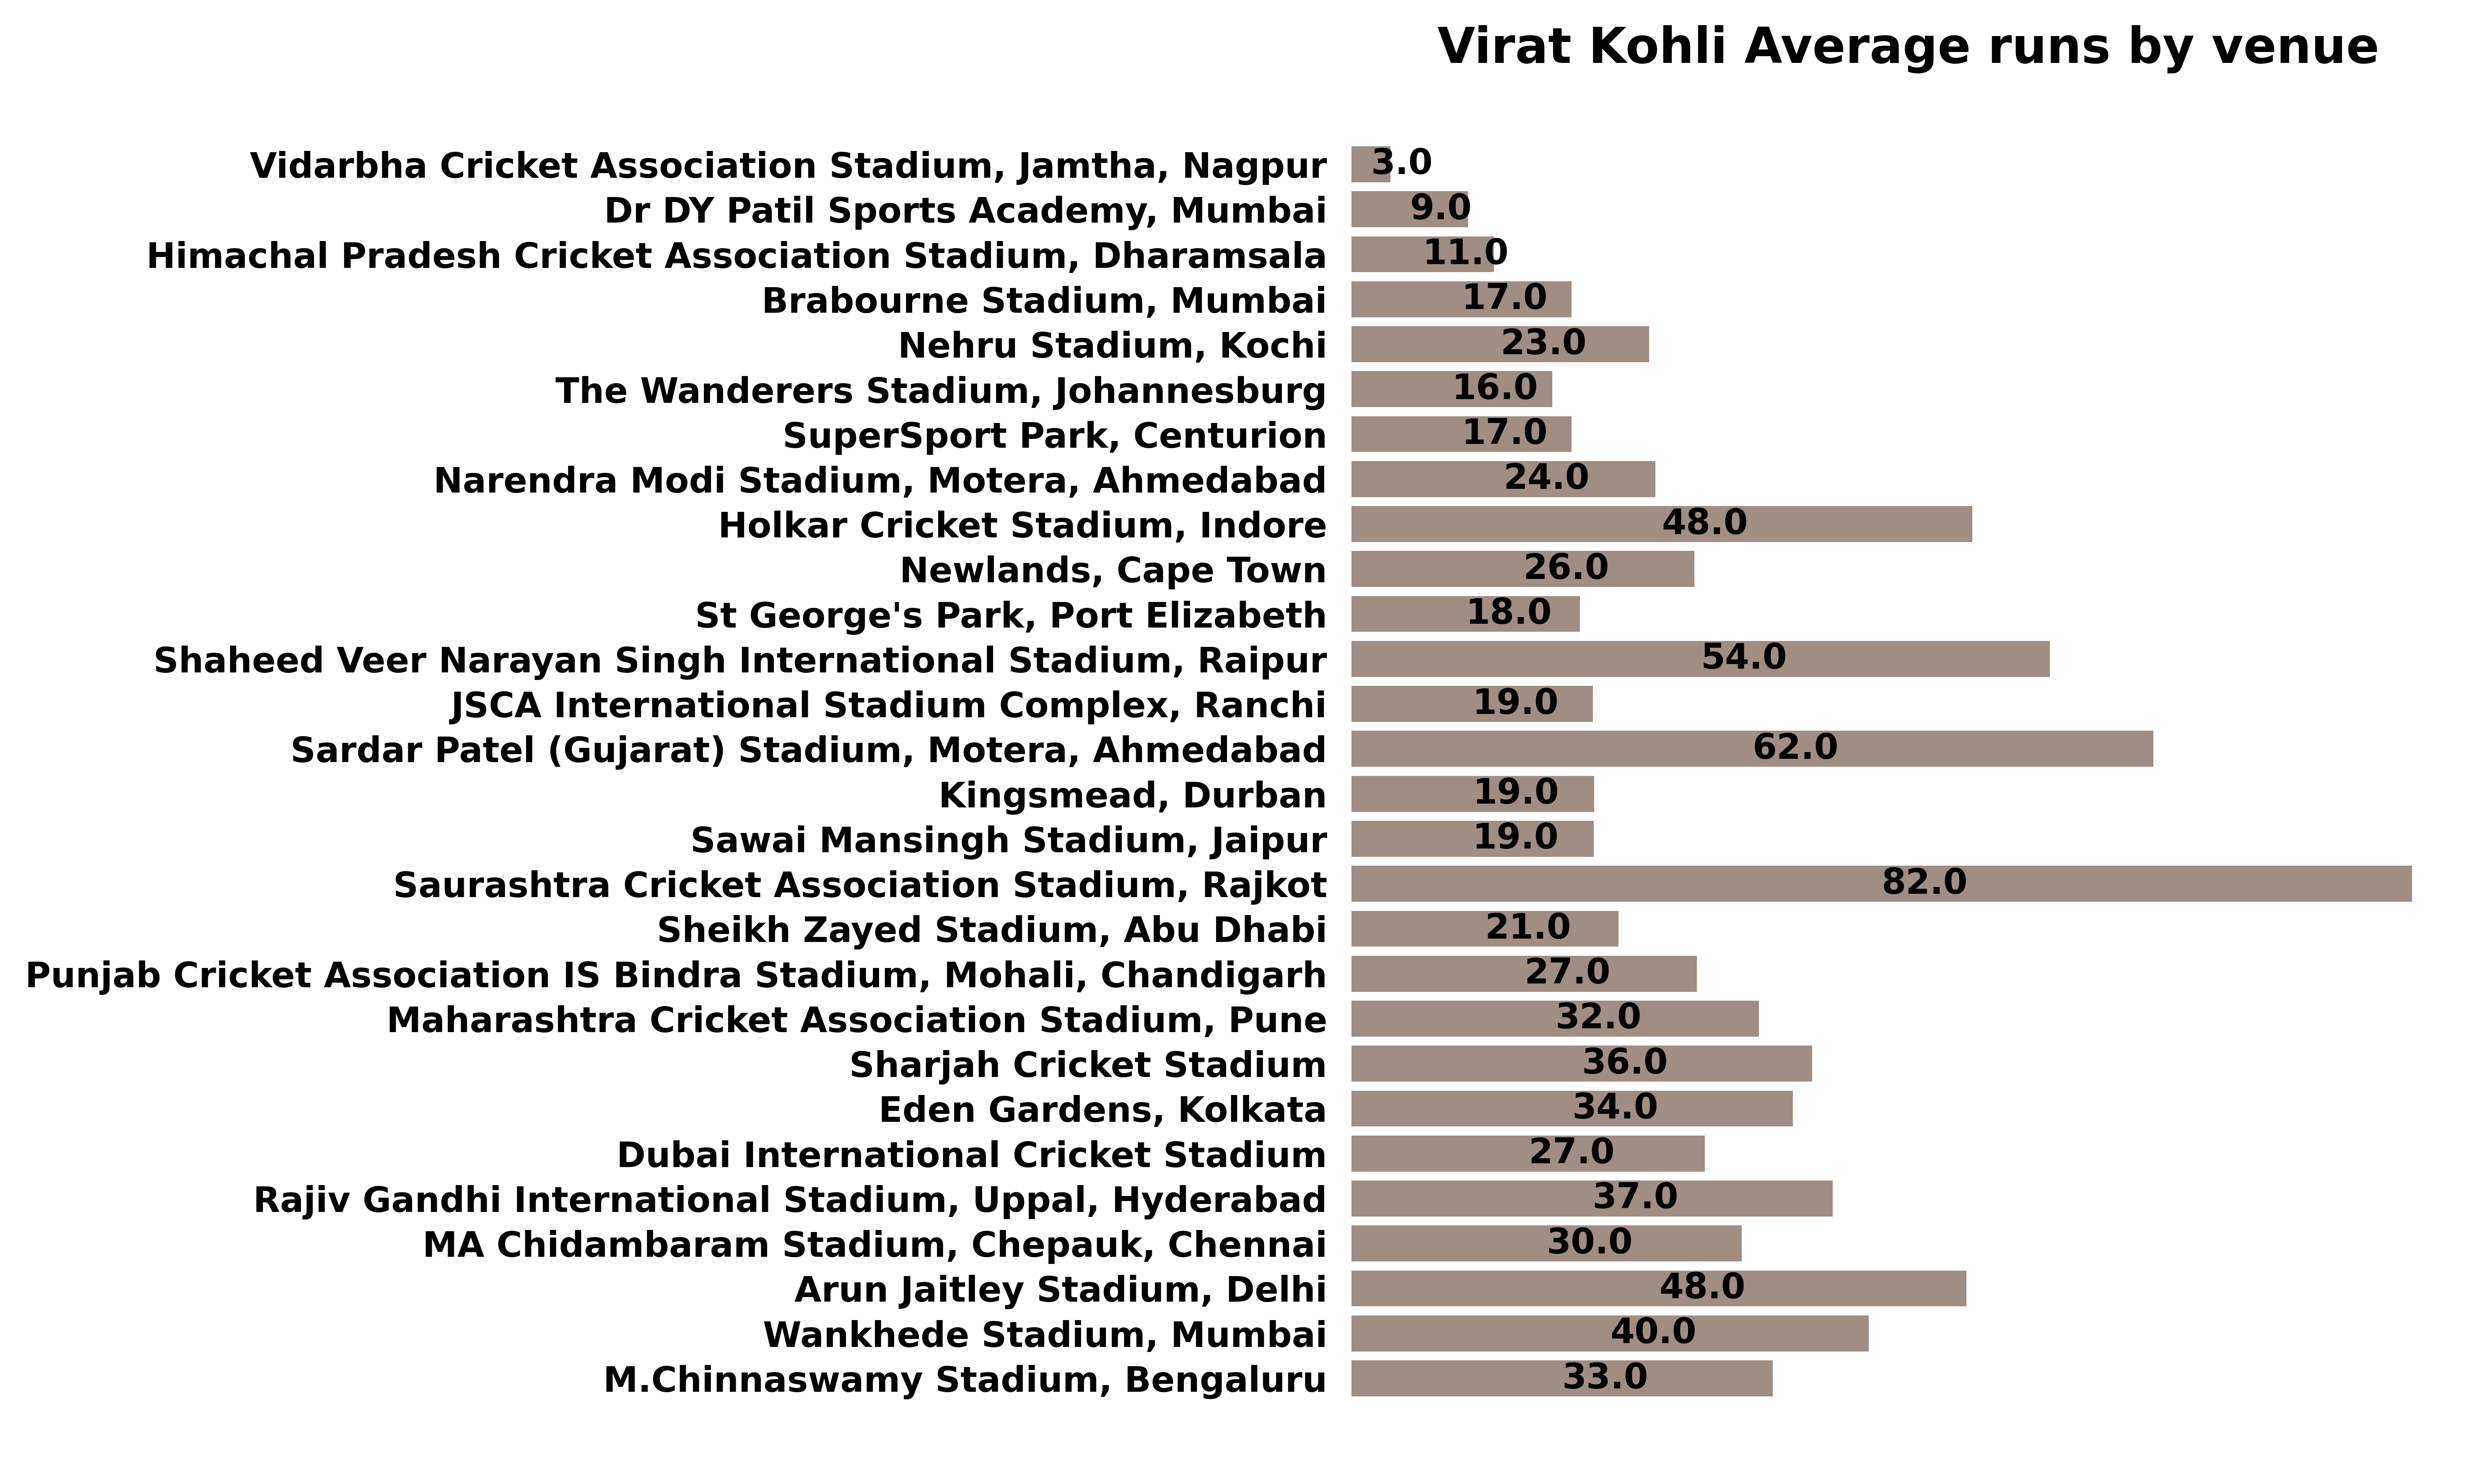

In [4]:
def batsmen_run_per_venue(batsman):
    batsmen_runs_venue = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    batsmen_runs_venue = batsmen_runs_venue[['runs', 'venue']]
    batsmen_runs_venue['matches'] = 1
    batsmen_runs_venue = batsmen_runs_venue.groupby(['venue']).sum()
    batsmen_runs_venue.reset_index(inplace=True)
    batsmen_runs_venue['average'] = batsmen_runs_venue['runs'] / batsmen_runs_venue['matches']
    batsmen_runs_venue = batsmen_runs_venue.reset_index()
    batsmen_runs_venue = batsmen_runs_venue.sort_values(by=['runs'], ascending=False)

    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 6), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = batsmen_runs_venue['venue'], width= batsmen_runs_venue['average'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(batsmen_runs_venue['venue'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Average runs by venue'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.savefig("../img/pngs/{}_runs_per_venue.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()

batsmen_run_per_venue('Virat Kohli')

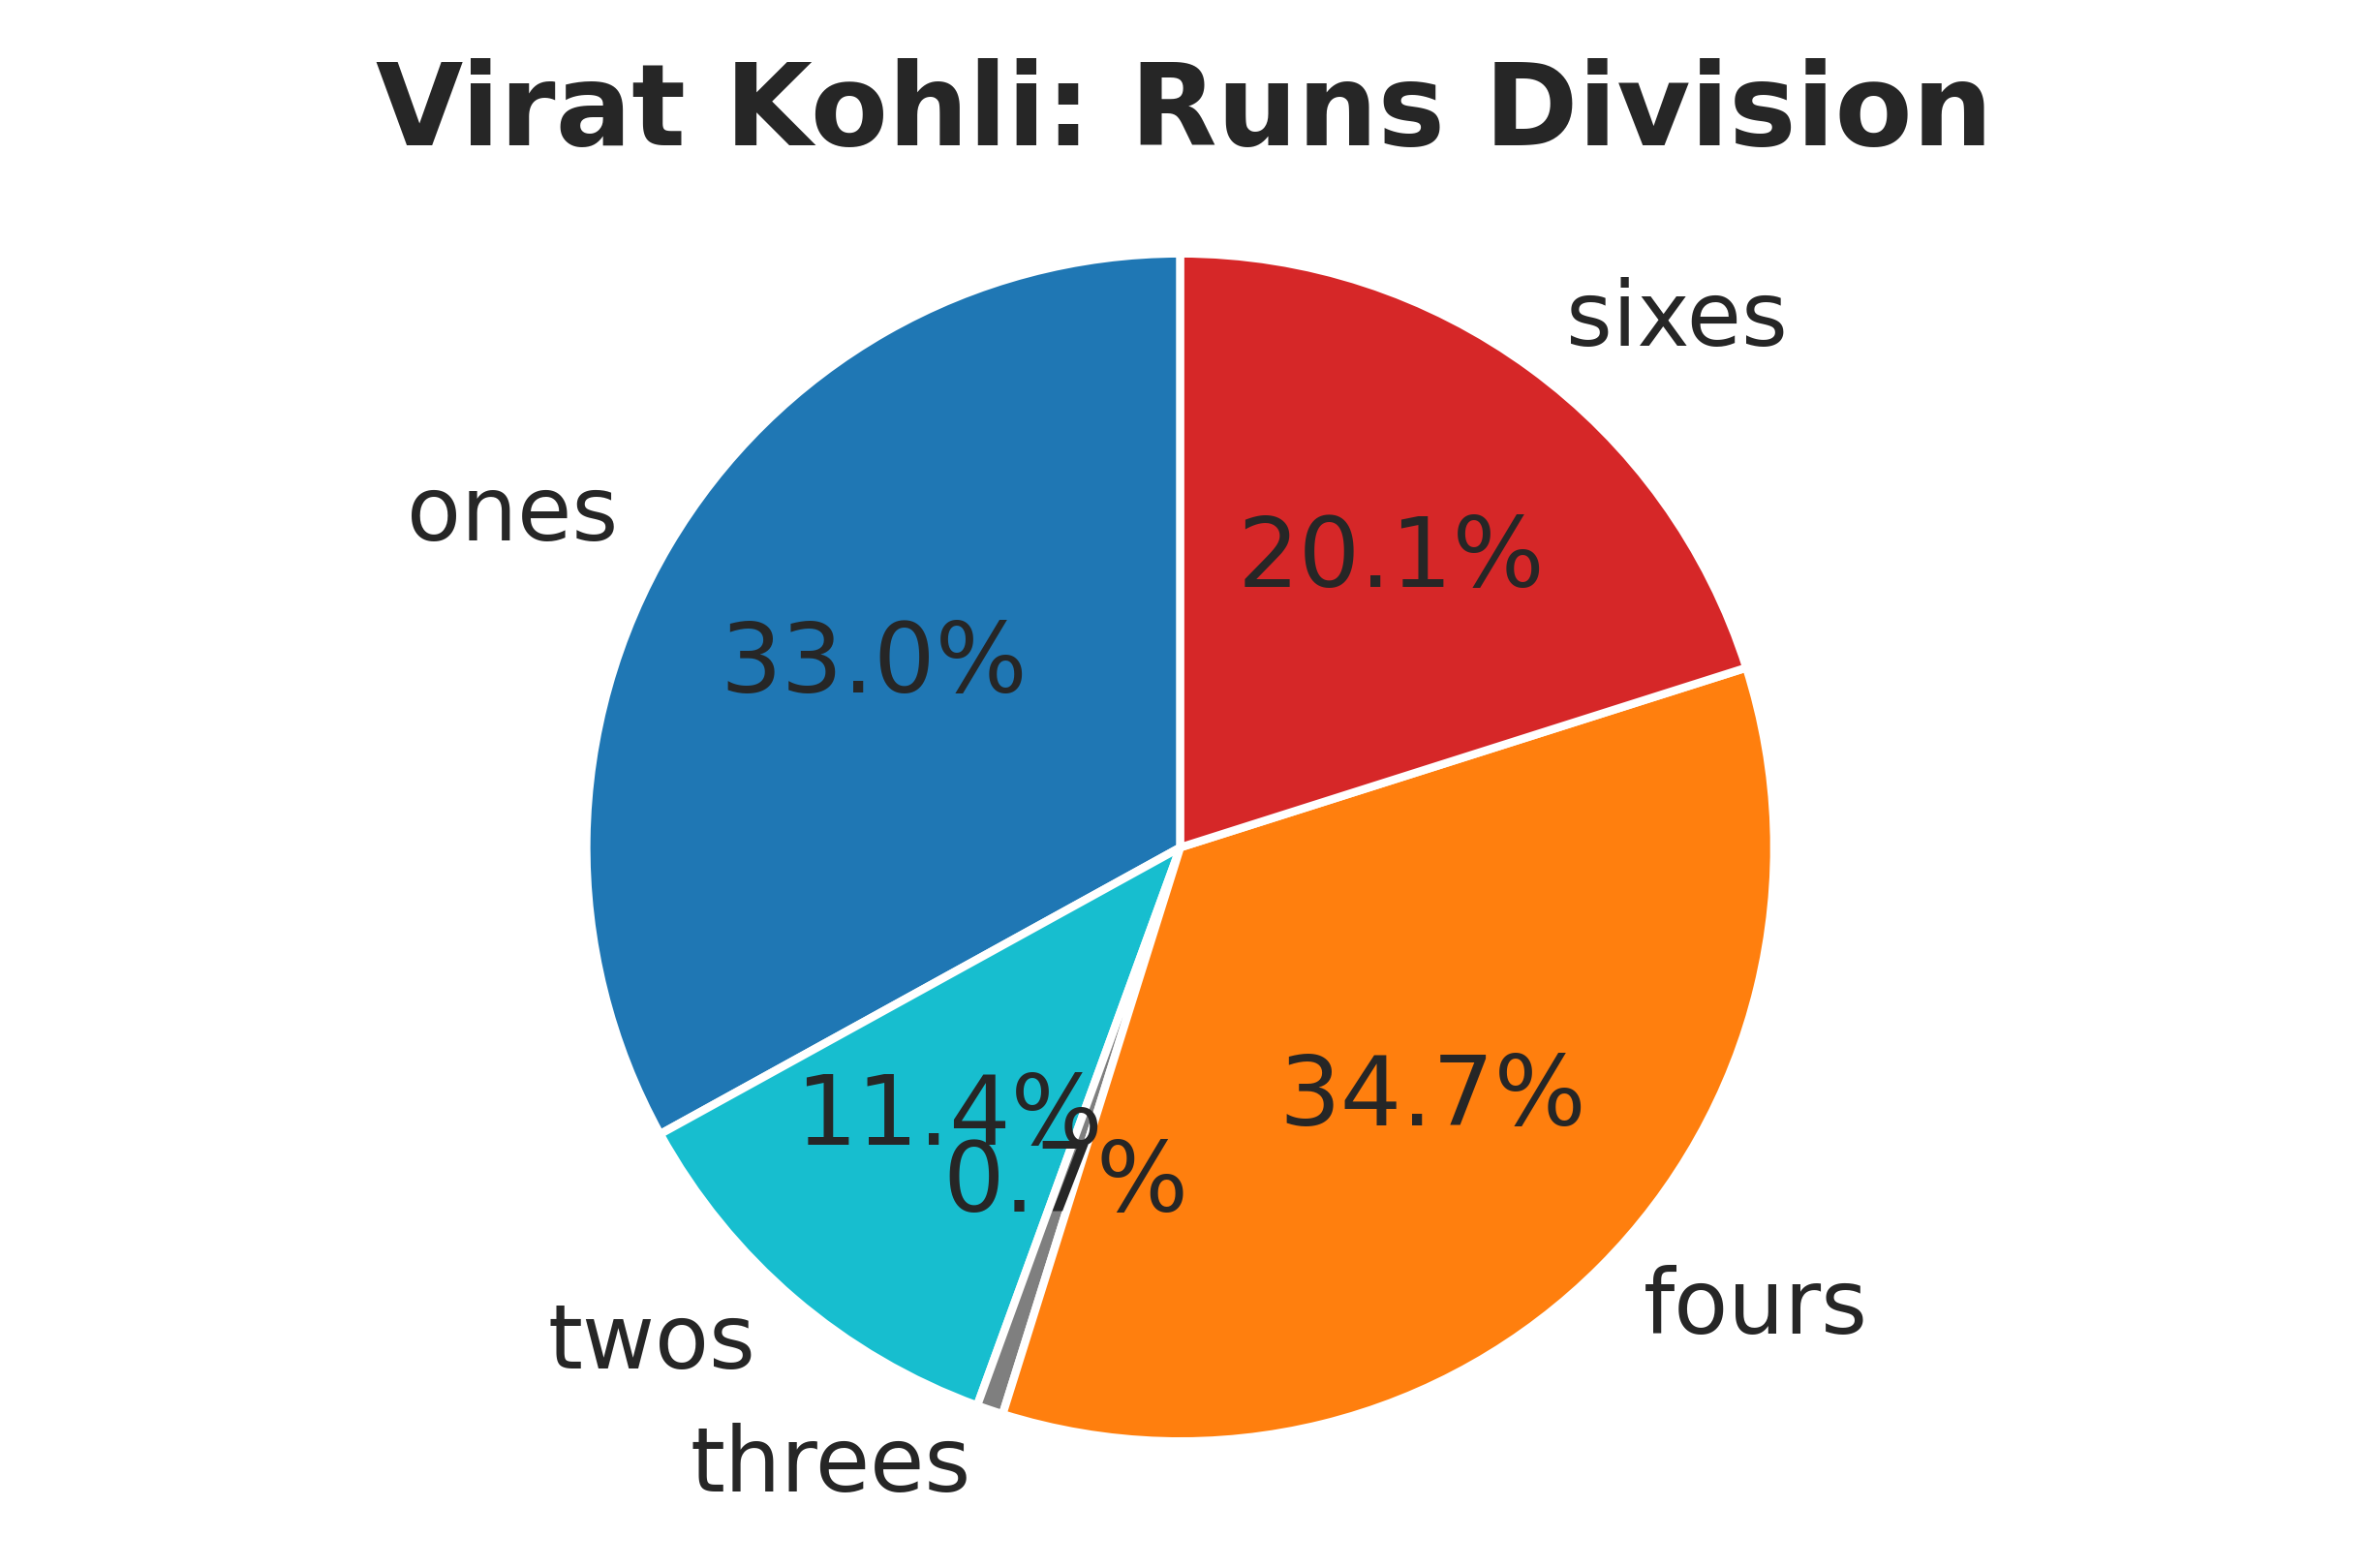

In [16]:
def bastmen_run_division(batsman):
    runs_per_ball = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_ball = runs_per_ball[runs_per_ball['isWide'] == False]
    runs_per_ball = runs_per_ball[runs_per_ball['isNoball'] == False]
    runs_per_ball = runs_per_ball['runs']
    runs_per_ball = list(runs_per_ball)
    runs_per_ball = [int(i) for i in runs_per_ball]
    runs_per_ball = np.array(runs_per_ball)
    # find frequency of each run
    runs_per_ball_freq = np.bincount(runs_per_ball)
    runs_per_division = [i*runs_per_ball_freq[i] for i in [1,2,3,4,6]]
    runs_per_division = np.array(runs_per_division)
    runs_per_division = runs_per_division * 100 / runs_per_division.sum()
    # take round 2 decimal
    runs_per_division = np.round(runs_per_division, 2)
    # plot
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(5, 3), facecolor='#ffffff')
    explode = (0, 0, 0, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
    labels = ['ones','twos','threes','fours', 'sixes']
    colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']
    plt.pie(runs_per_division, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90, colors = colors)
    plt.axis('equal') 
    

    plt.title('{}: Runs Division'.format(batsman), fontsize=14, fontweight='bold')
    plt.savefig("../img/pngs/{}_runs_division.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()

bastmen_run_division('Virat Kohli')

/tmp/ipykernel_13337/2909545650.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



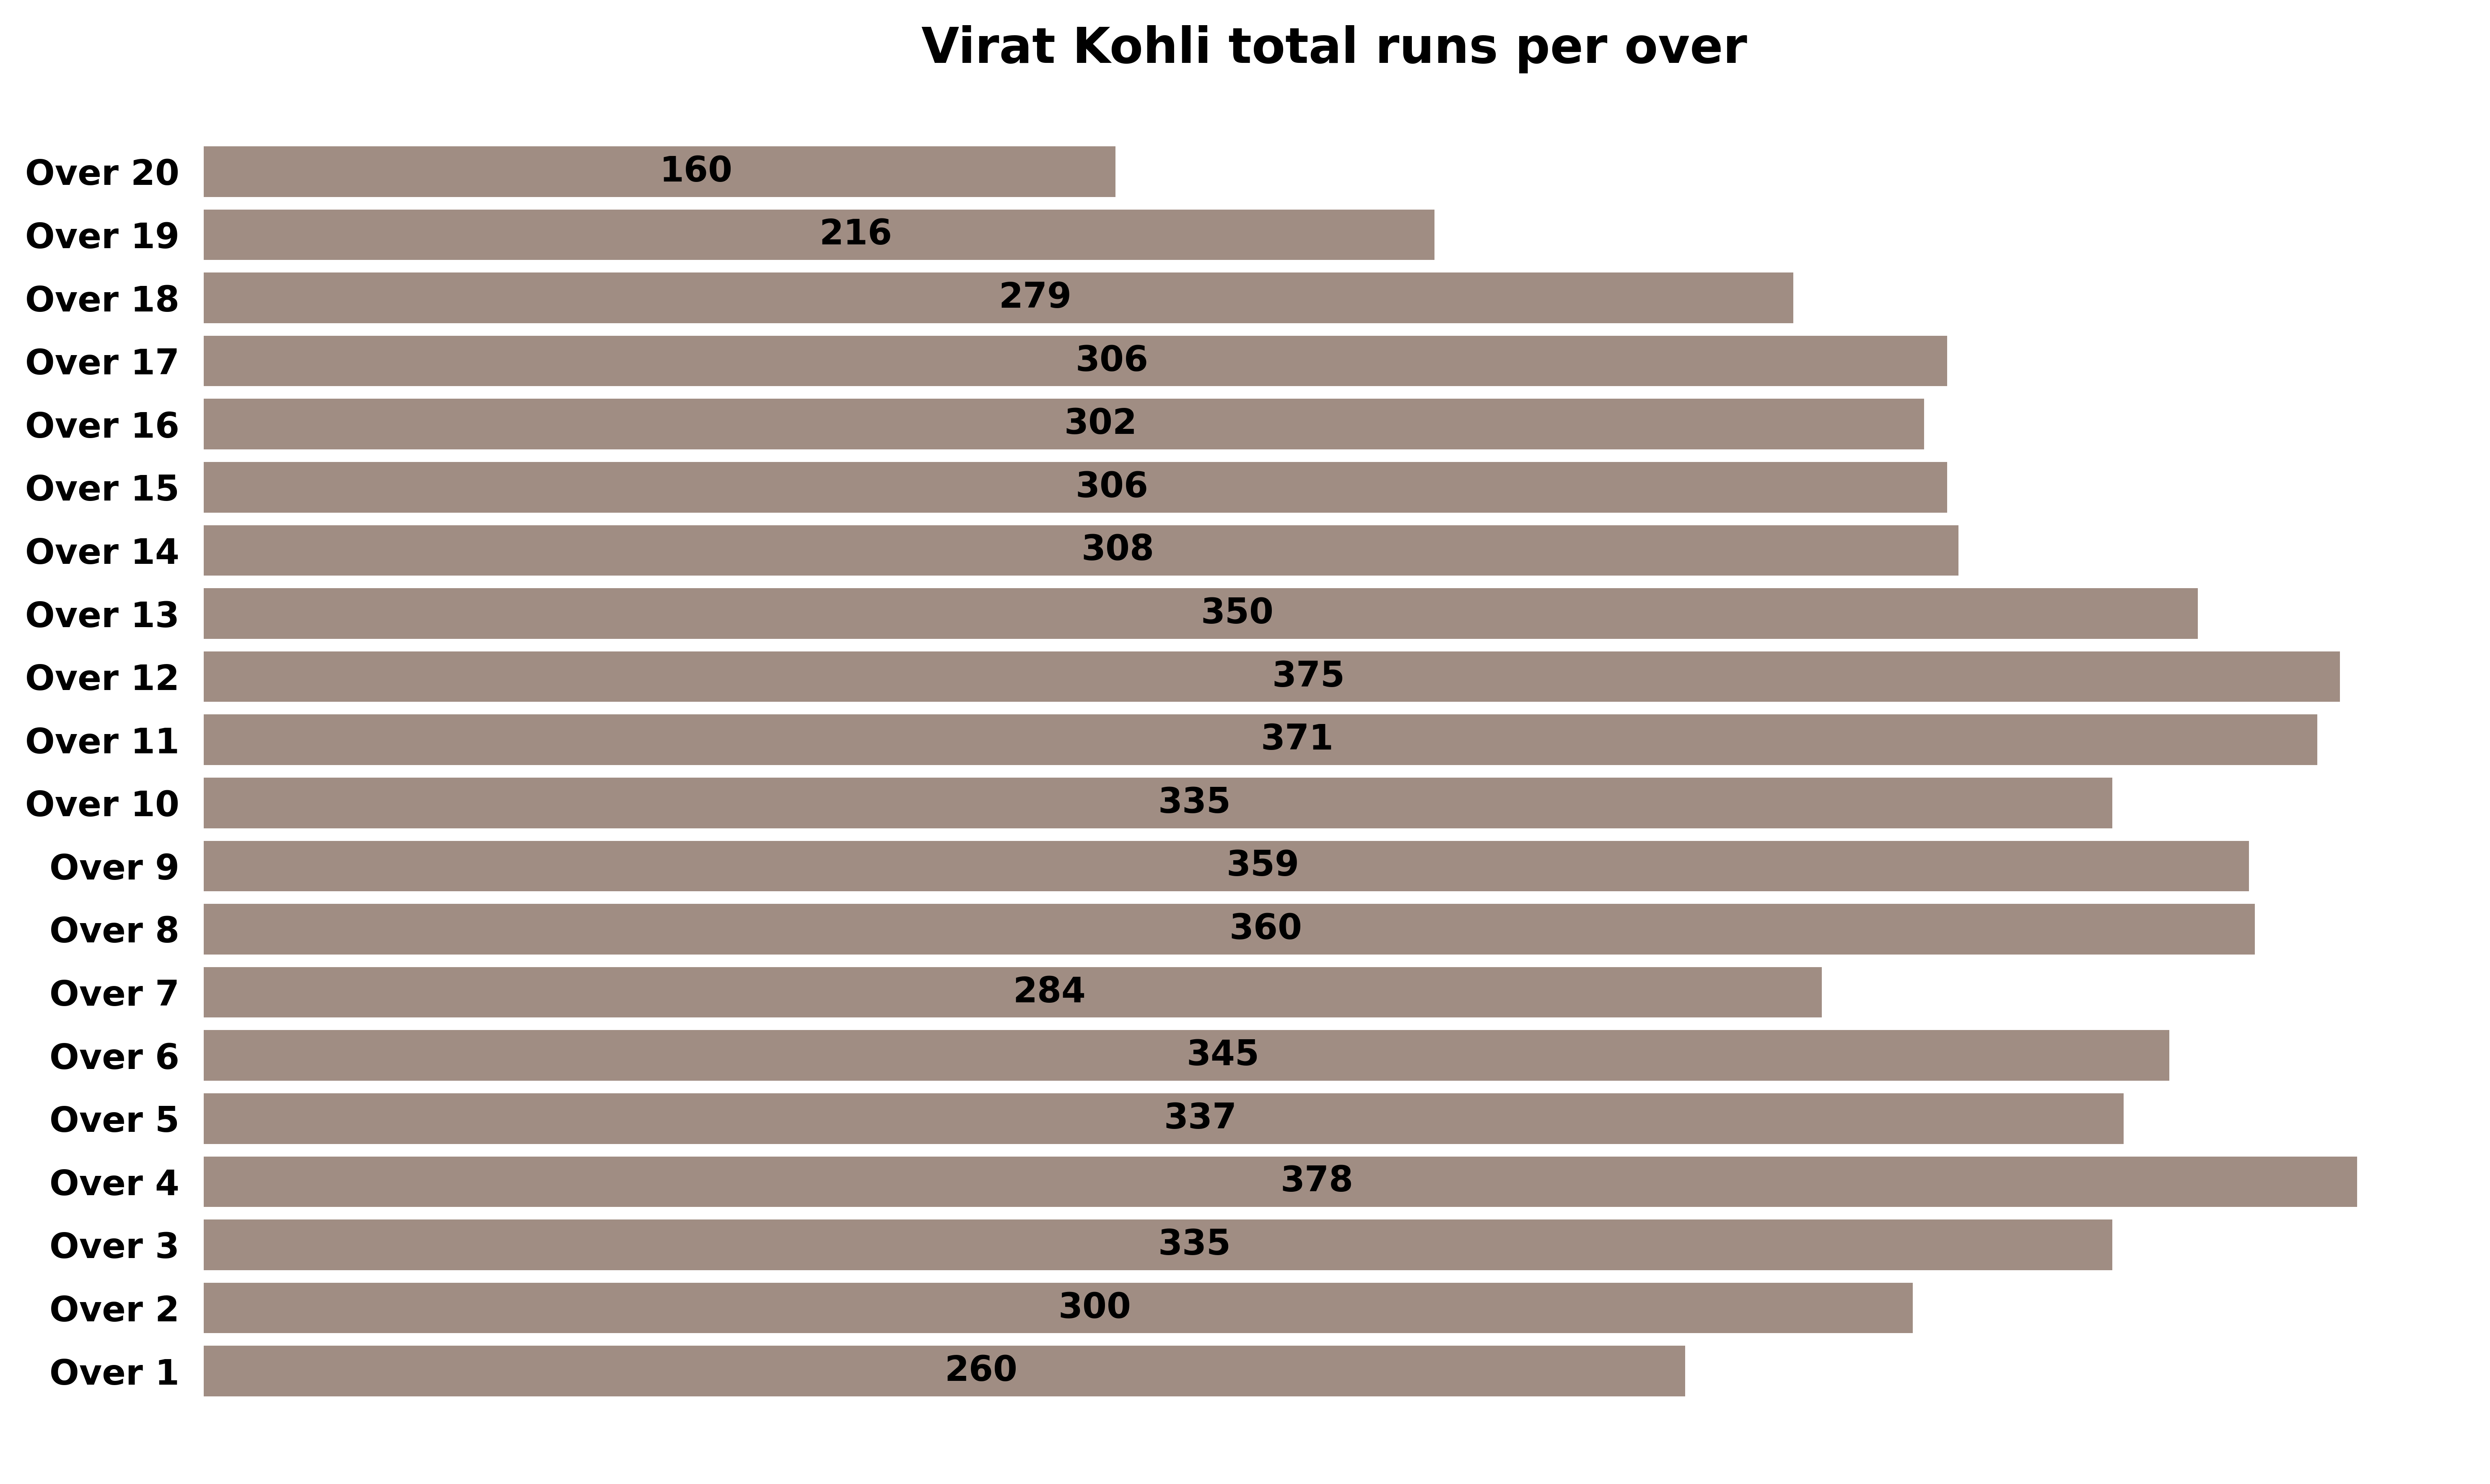

In [6]:
def runs_per_over(batsman):
    runs_per_over = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over['avg_run'] = runs_per_over['runs'] / runs_per_over['balls']
    runs_per_over['strike rate'] = runs_per_over['avg_run'] * 100
    runs_per_over = runs_per_over.reset_index()
    runs_per_over['over'] = runs_per_over['over'].astype(int)
    runs_per_over['over'] = runs_per_over['over'].map(lambda x : "Over "+ str(x))
    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 6), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = runs_per_over['over'], width= runs_per_over['runs'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(runs_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} total runs per over'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.savefig("../img/pngs/{}_runs_per_over.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()

runs_per_over('Virat Kohli')

/tmp/ipykernel_13337/2981966630.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator



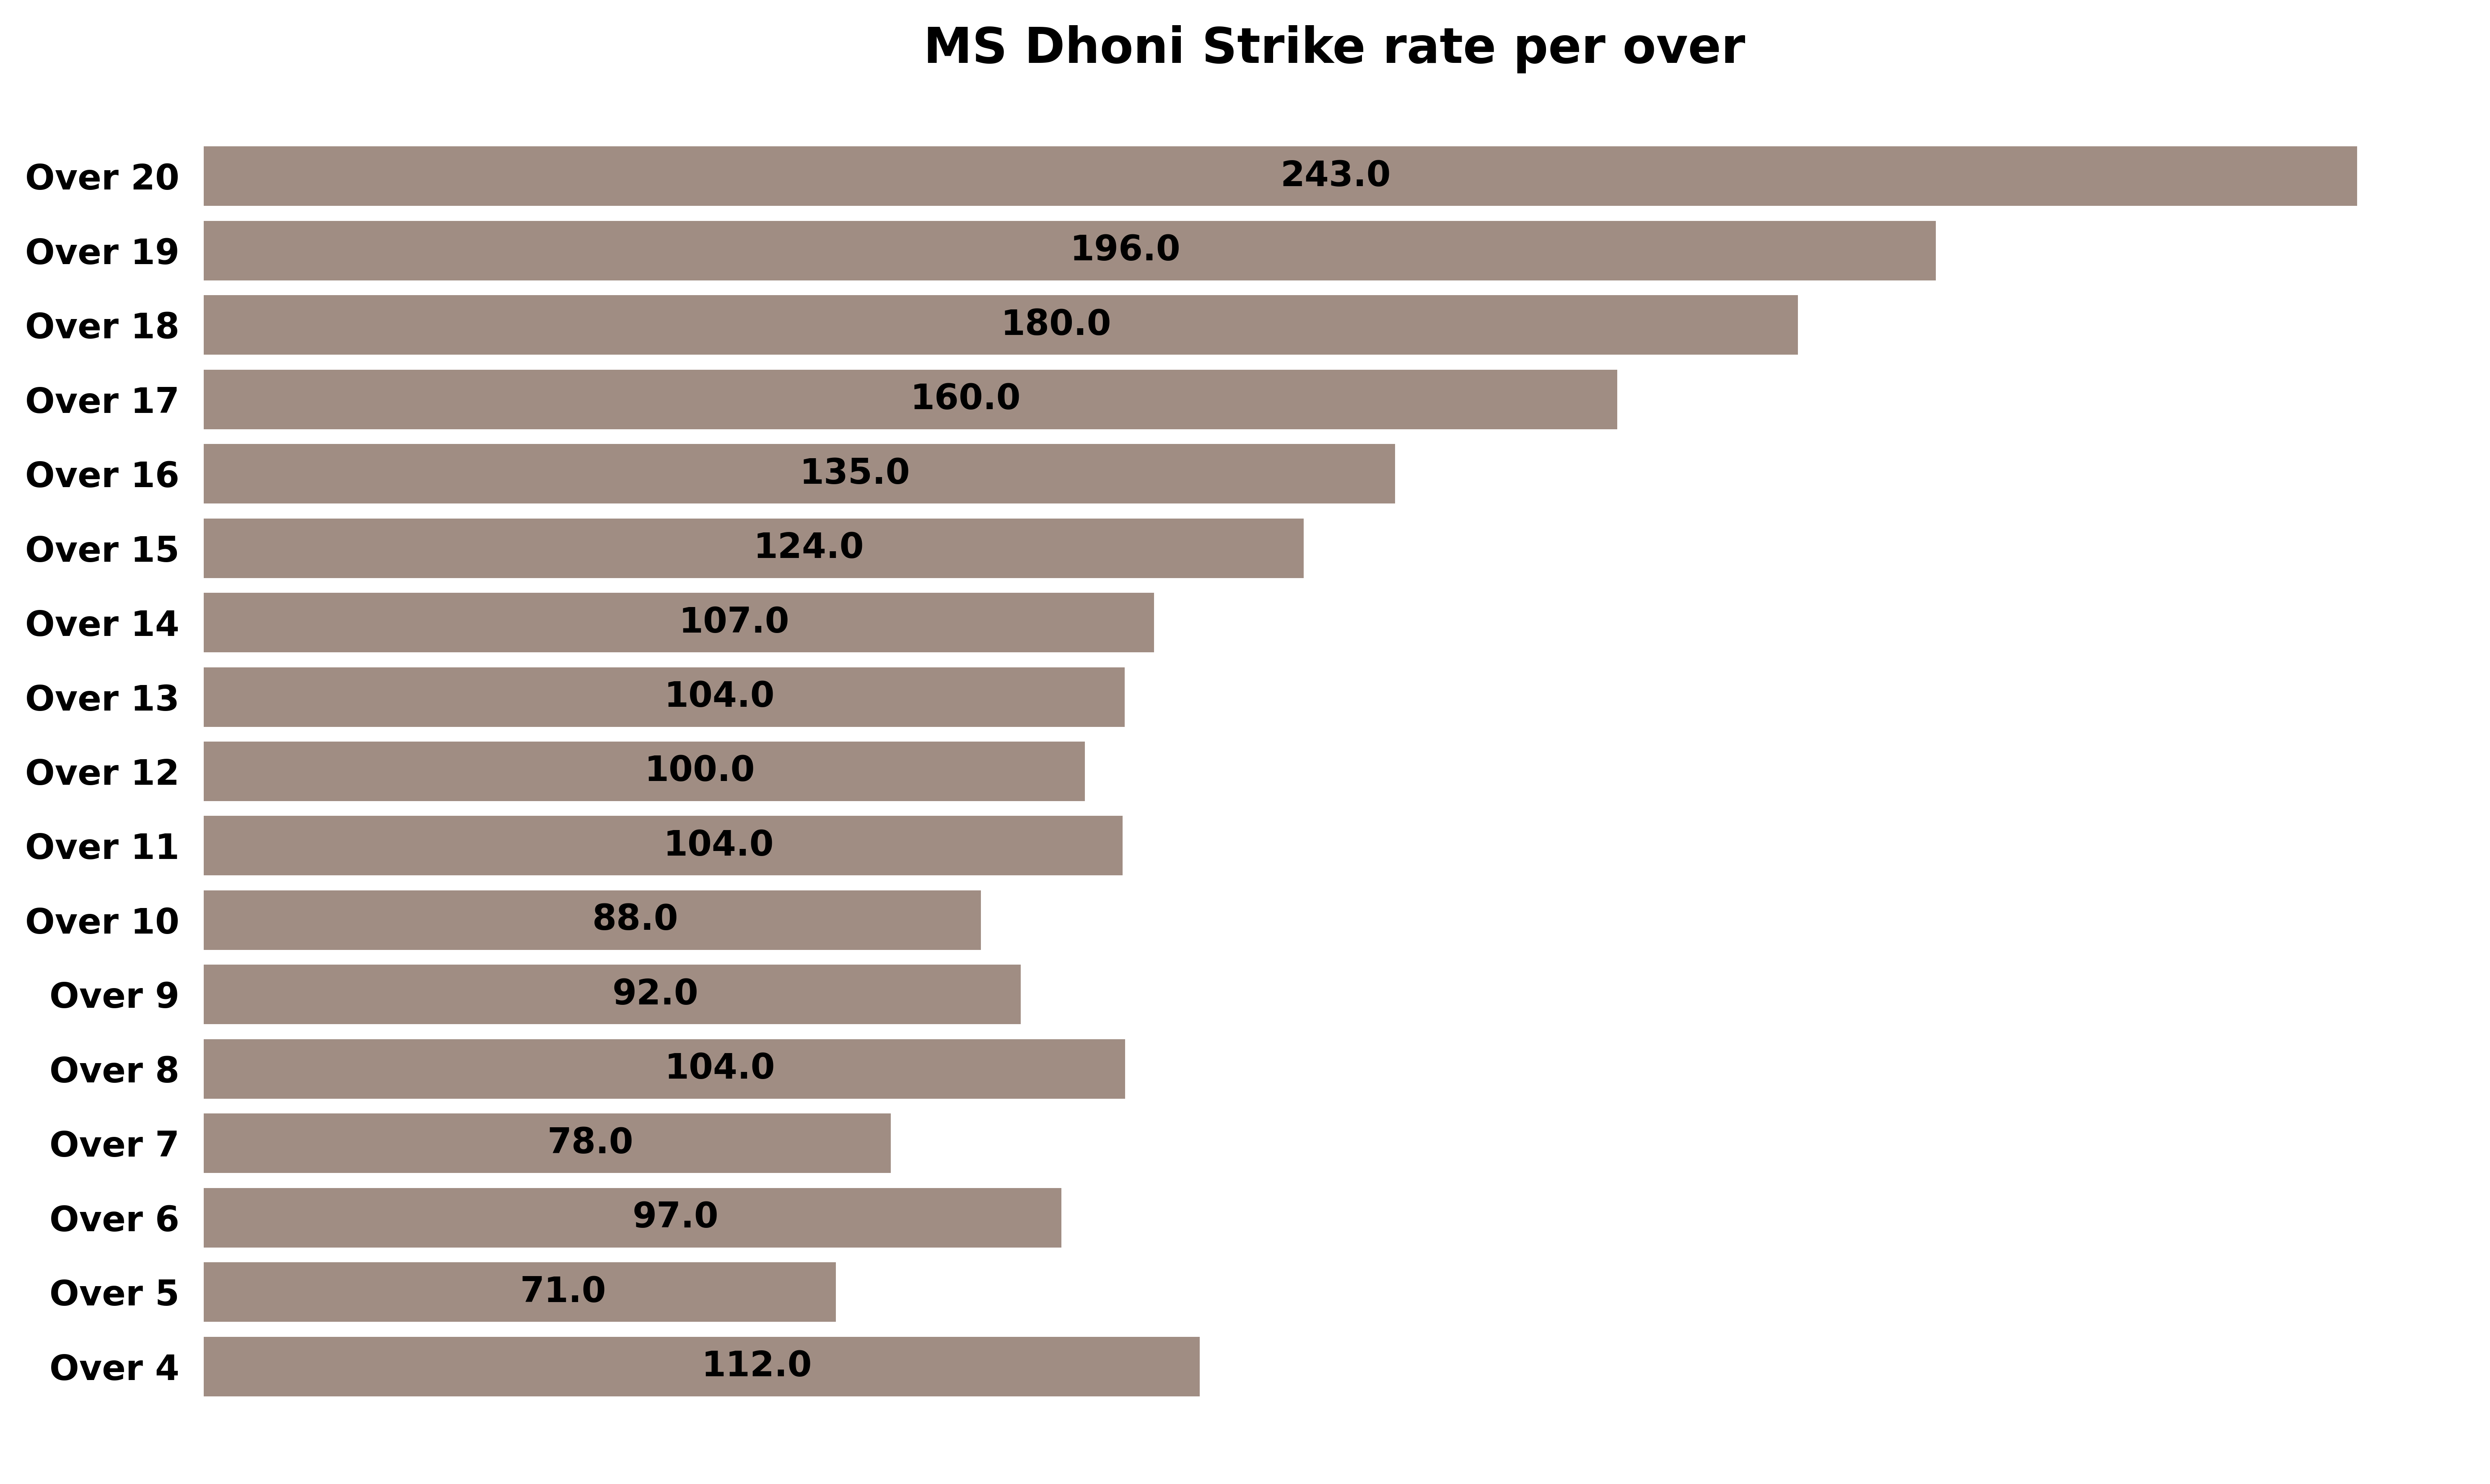

In [7]:
def strike_rate_per_over(batsman):
    runs_per_over = season_details_df[season_details_df['batsman1_name'] == batsman]
    runs_per_over = runs_per_over[runs_per_over['isWide'] == False]
    runs_per_over = runs_per_over[runs_per_over['isNoball'] == False]
    runs_per_over = runs_per_over[['over','runs']]
    runs_per_over['balls'] = 1
    runs_per_over = runs_per_over.groupby(['over']).sum()
    runs_per_over  = runs_per_over[runs_per_over['runs'] > 0]
    runs_per_over['avg_run'] = runs_per_over['runs'] / runs_per_over['balls'].map(lambda x : max(x,1))
    runs_per_over['strike rate'] = runs_per_over['avg_run'] * 100
    runs_per_over = runs_per_over.reset_index()
    runs_per_over['over'] = runs_per_over['over'].astype(int)
    runs_per_over['over'] = runs_per_over['over'].map(lambda x : "Over "+ str(x))
    # plot
    #Plot the data
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(10, 6), facecolor='#ffffff')

    gs = fig.add_gridspec(1,1)
    gs.update(wspace=0.3, hspace=0.4)

    locals()["ax"+str(0)] = fig.add_subplot(gs[0, 0])
    locals()["ax"+str(0)].set_facecolor(background_color)
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].barh(y = runs_per_over['over'], width= runs_per_over['strike rate'], label='runs', color='#A08D83')
    locals()["ax"+str(0)].set_yticklabels(runs_per_over['over'], fontsize=10, fontweight='bold')
    locals()["ax"+str(0)].set_title('{} Strike rate per over'.format(batsman),fontsize=14, fontweight='bold')
    for s in ['left', 'right', 'top', 'bottom']:
        locals()["ax"+str(0)].spines[s].set_visible(False)

    locals()["ax"+str(0)].xaxis.set_visible(False) 
    locals()["ax"+str(0)].tick_params(left=False)

    for p in locals()["ax"+str(0)].patches:
        value = f'{round(p.get_width(),0)}'        
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 
        locals()["ax"+str(0)].text(x, y, value, ha='left', va='center', fontsize=10, color='black',fontweight='bold')
            
    gs.tight_layout(fig, rect=[0, 0, 1, 1])
    plt.savefig("../img/pngs/{}_strike_rate_per_over.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()

strike_rate_per_over('MS Dhoni')

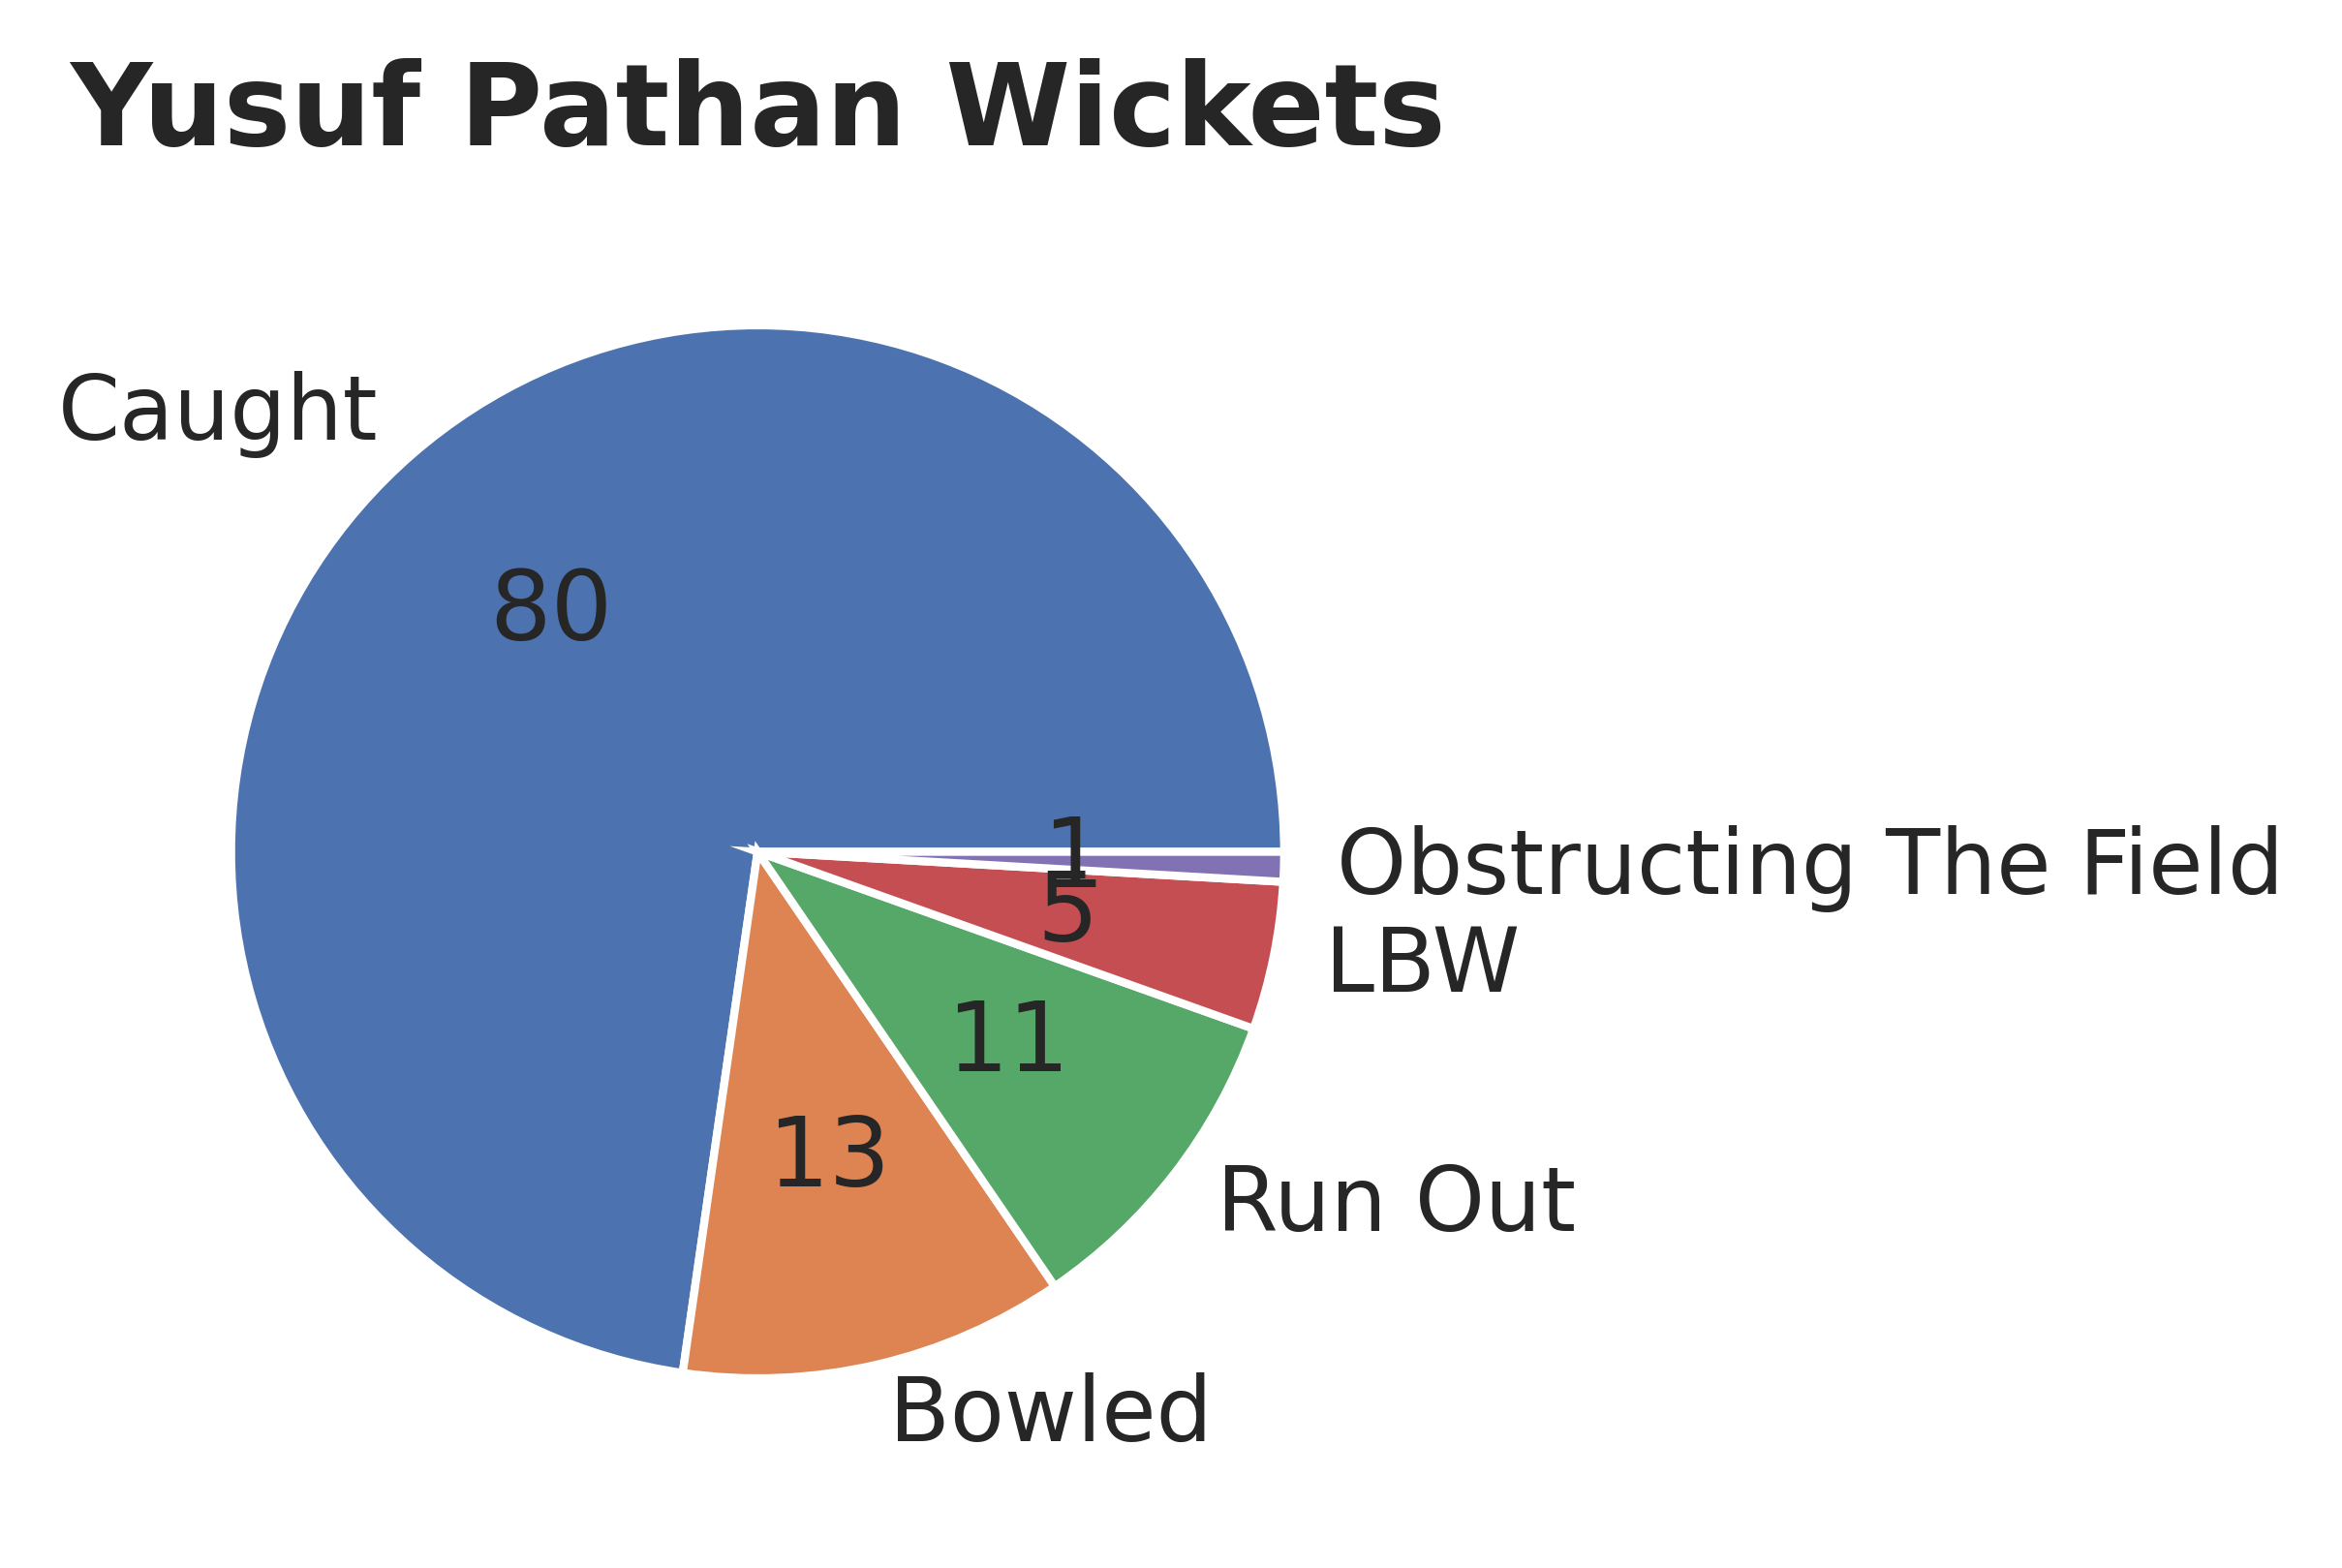

In [15]:
def type_of_wicket(batsman):
    wickets = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    # wickets = season_batting_card_df
    wickets = wickets[wickets['isNotOut'] == False]
    wickets = wickets['shortText']
    
    def wicket_map(text):
        text = text.split(' ')
        if 'lbw' in text:
            return 'LBW'
        if 'run' in text and 'out' in text:
            return 'Run Out'
        if 'c' in text and 'b' in text:
            return 'Caught'
        if 'b' in text:
            return 'Bowled'
        if 'st' in text:
            return 'Stumped'
        text = " ".join(text)
        # make first latter capital
        text = text.title()
        return text
    
    wickets = wickets.map(wicket_map)
    wickets = wickets.value_counts()
    wickets = wickets.reset_index()
    wickets = pd.DataFrame(wickets)
    wickets.columns = ['wicket', 'count']
    # return wickets
    labels = wickets['wicket'].tolist()
    sizes = wickets['count'].tolist()
    plt.rcParams['figure.dpi'] = 600
    background_color = '#ffffff'
    fig = plt.figure(figsize=(5, 3), facecolor='#ffffff')
    total = sum(sizes)
    p, tx, autotexts = plt.pie(sizes, labels=labels, autopct="")
    for i, a in enumerate(autotexts):
        a.set_text("{}".format(sizes[i]))
    sns.set(font_scale=1)
    plt.title('{} Wickets'.format(batsman),fontsize=14, fontweight='bold')
    plt.savefig("../img/pngs/{}_wickets.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()


type_of_wicket('Yusuf Pathan')


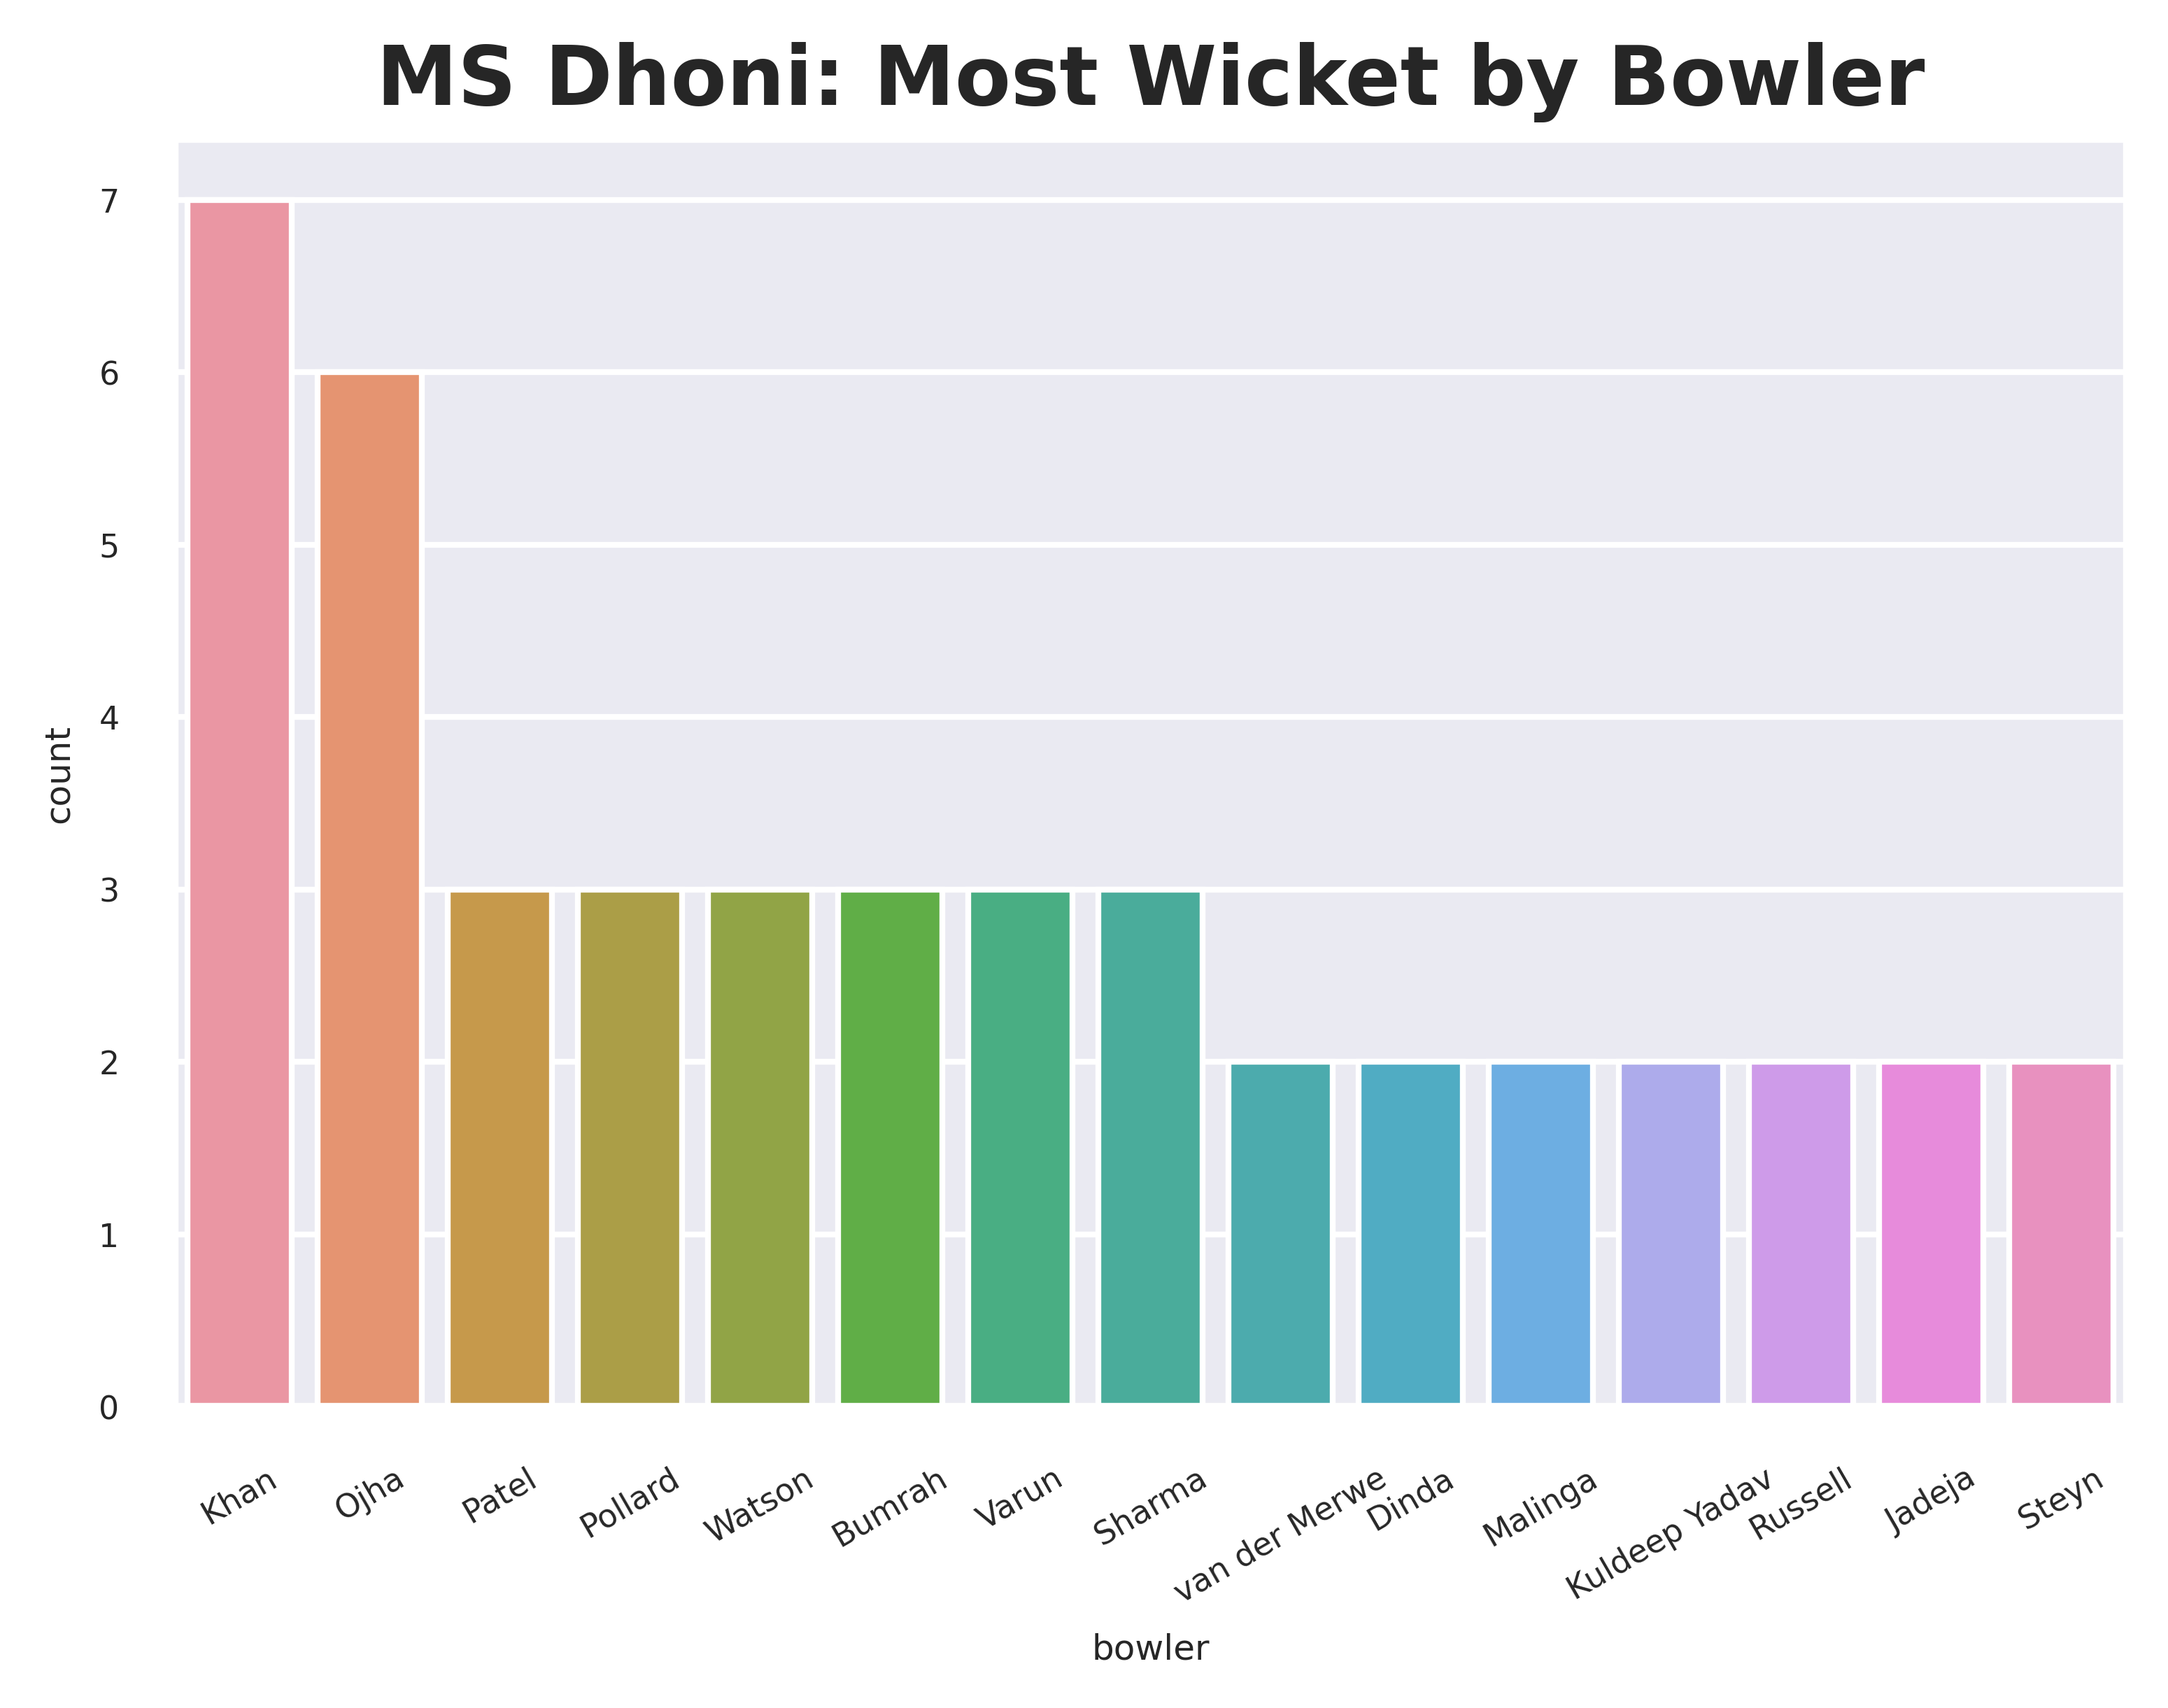

In [10]:
def most_wicket_bowler(batsman):
    wickets = season_batting_card_df[season_batting_card_df['fullName'] == batsman]
    # wickets = season_batting_card_df
    wickets = wickets[wickets['isNotOut'] == False]
    wickets = wickets['shortText']
    
    def wicket_map(text):
        text = text.split(' ')
        if 'lbw' in text:
            return 'LBW'
        if 'run' in text and 'out' in text:
            return 'Run Out'
        if 'c' in text and 'b' in text:
            return 'Caught'
        if 'b' in text:
            return 'Bowled'
        if 'st' in text:
            return 'Stumped'
        text = " ".join(text)
        # make first latter capital
        text = text.title()
        return text
    
    wickets = pd.DataFrame(wickets)
    wickets['wicket'] = wickets['shortText'].map(wicket_map)
    wickets = wickets[wickets['wicket'] != 'Run Out']
    wickets = wickets[wickets['wicket'] != 'Obstructing The Field']
    wickets = wickets[wickets['wicket'] != 'Retired Hurt']

    def getBowler(text):
        text = text.split(' ')
        b_index = text.index('b')
        return " ".join(text[b_index+1:])
    wickets['bowler'] = wickets['shortText'].map(getBowler)
    wickets['count'] = 1
    wickets = wickets.groupby(['bowler']).sum()
    wickets = wickets.sort_values(by='count', ascending=False)
    wickets = wickets.reset_index()
    wickets = wickets.head(15)
    # wickets.plot(kind='bar', x='bowler', y='count', figsize=(10, 10), legend=False)
    sns.set(font_scale=0.5)
    ax = sns.barplot(x='bowler', y='count', data=wickets)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    plt.title('{}: Most Wicket by Bowler'.format(batsman),fontsize=14, fontweight='bold')
    plt.savefig("../img/pngs/{}_most_wicket_bowler.png".format(batsman), facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()

most_wicket_bowler('MS Dhoni')